# Example of [dwdatareader](https://pypi.org/project/dwdatareader/) inside a Jupyter notebook

## Run simple examples

In [1]:
import dwdatareader as dw
print(dw.__version__, dw.getVersion())

0.13.2 4020019


### Option 1: Read entire file into Pandas dataframe
Warning: May be *huge*

In [2]:
with dw.open('Example_Drive01.d7d') as d7d:
  print(d7d.info)
  df = d7d.dataframe() # all channels by default
print(df)

2003-10-09 21:27:46.812004+00:00 100.0 Hz 95.8 s
          GPSvel  Math 0  STWH_ANGLE  ...  Direction  Used sattelites        CNT 0
0.00   89.257812     0.0         0.0  ...        NaN              NaN     0.248333
0.01         NaN     NaN         0.0  ...        NaN              NaN          NaN
0.01   89.263916     0.0         NaN  ...        NaN              NaN     0.496389
0.02         NaN     NaN         0.0  ...        NaN              NaN          NaN
0.02   89.270020     0.0         NaN  ...        NaN              NaN     0.744722
...          ...     ...         ...  ...        ...              ...          ...
95.77        NaN     NaN         0.0  ...        NaN              NaN          NaN
95.78  -0.085449     0.0         NaN  ...        NaN              NaN  1891.475879
95.78        NaN     NaN         0.0  ...        NaN              NaN          NaN
95.79        NaN     NaN         0.0  ...        NaN              NaN          NaN
95.79  -0.091553     0.0         NaN  

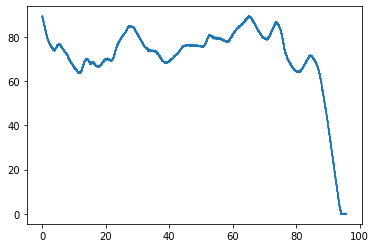

In [3]:
# Plot a channel
df['GPSvel'].plot()

### Option 2: Read only selected channels to reduce memory requirement

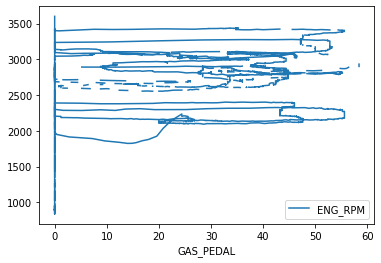

In [4]:
with dw.open('Example_Drive01.d7d') as d7d:
  df = d7d.dataframe(channels=['GAS_PEDAL', 'ENG_RPM'])
df.plot(x='GAS_PEDAL', y='ENG_RPM')

### Option 3: Operate on chunks of a specific channel to minimize memory requirement

In [5]:
with dw.open('Example_Drive01.d7d') as d7d:
  ch = d7d['GPSvel']
  print('Channel:', ch)
  print(ch.number_of_samples, 'total samples')
  for df in ch.series_generator(chunk_size=2000):
    print(df.index[0], 's,', len(df), 'samples, mean velocity', df.mean(), ch.unit)

Channel: GPSvel (kph) v
9580 total samples
0.0 s, 2000 samples, mean velocity 71.3724578857422 kph
20.0 s, 2000 samples, mean velocity 75.65996704101562 kph
40.0 s, 2000 samples, mean velocity 76.49486999511718 kph
60.0 s, 2000 samples, mean velocity 80.88096313476562 kph
80.0 s, 1580 samples, mean velocity 45.3124150143394 kph


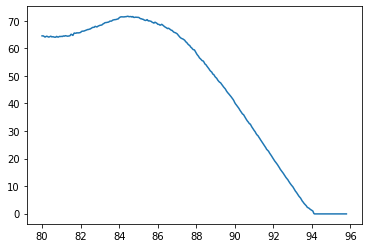

In [6]:
# Plot the last chunk
df.plot()